In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = sns.load_dataset('mpg')
data


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [62]:
df = pd.DataFrame(data)
#X=df[['cylinders','displacement','horsepower','weight','acceleration','model_year','origin','name']]
df=df.drop(columns=['name'])
df['model_year'] = df['model_year']
X['model_year'] = X['model_year'].astype('object')
X['cylinders'] = X['cylinders'].astype('object')
X=df.drop(columns=['mpg'])
y=df['mpg']

display(X.head())
display(y.head())
display(df['cylinders'].unique())

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504,12.0,70,usa
1,8,350.0,165.0,3693,11.5,70,usa
2,8,318.0,150.0,3436,11.0,70,usa
3,8,304.0,150.0,3433,12.0,70,usa
4,8,302.0,140.0,3449,10.5,70,usa


0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

array([8, 4, 6, 3, 5], dtype=int64)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=231)

In [64]:
x_train.shape


(318, 7)

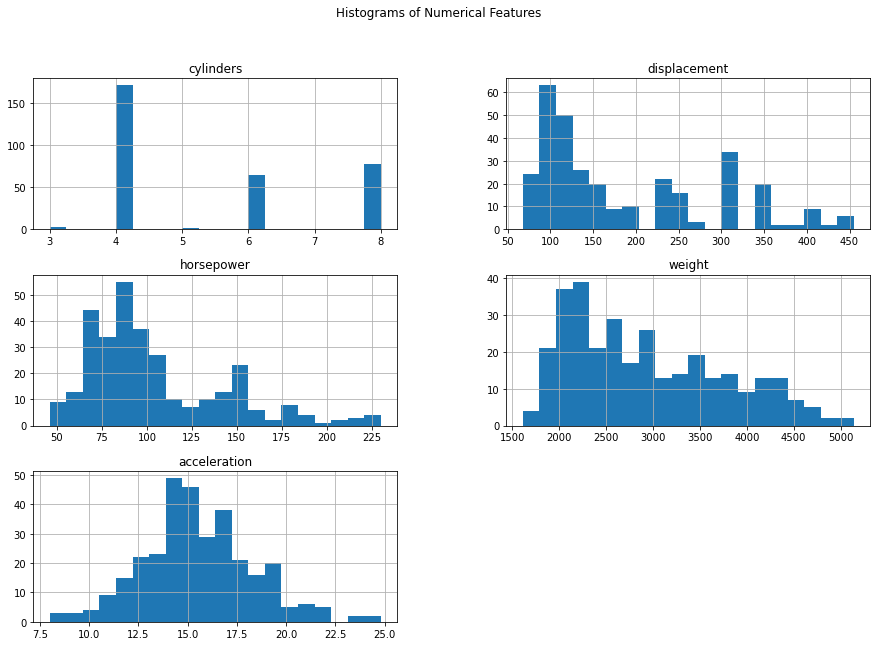

In [24]:
x_train.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

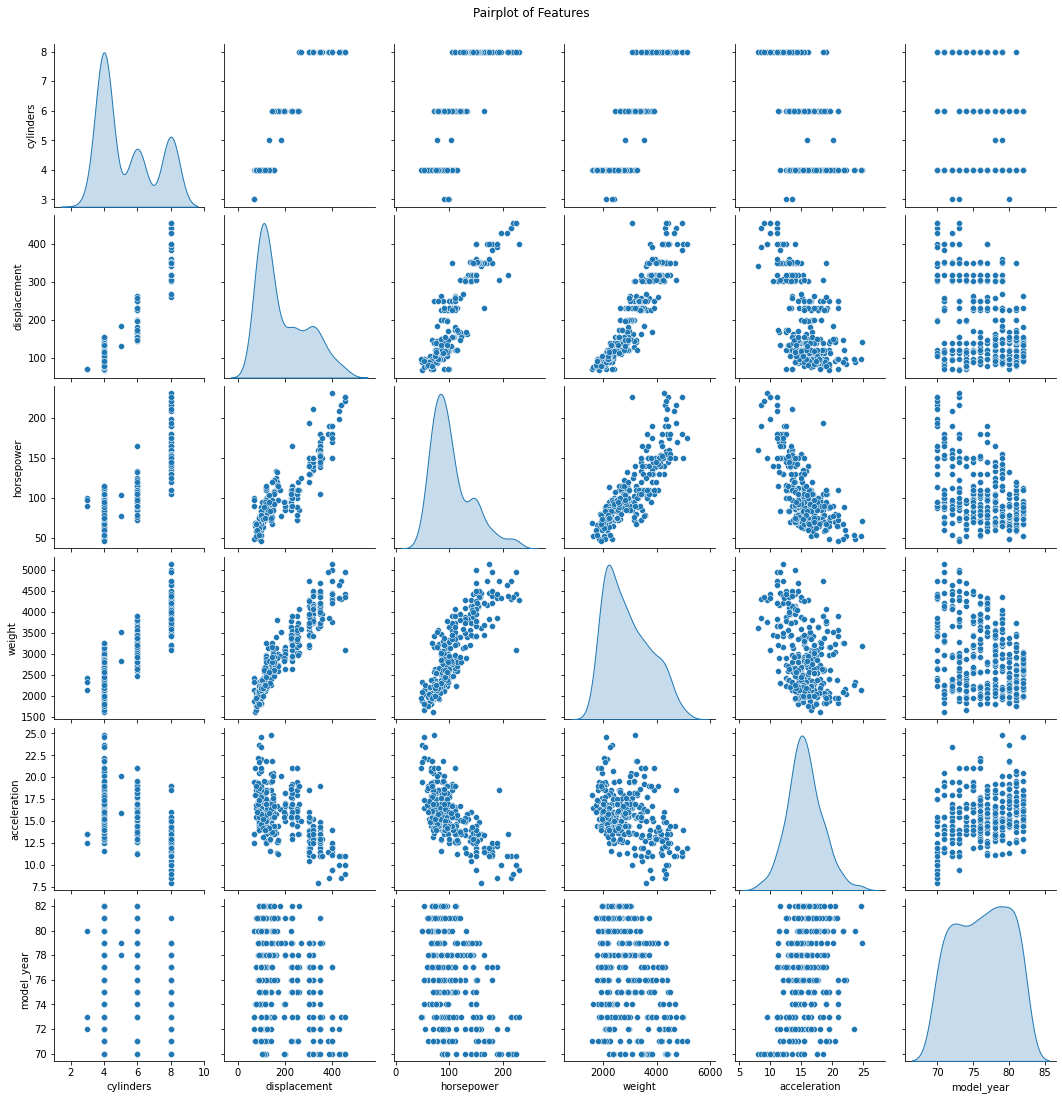

In [25]:
sns.pairplot(x_train, diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

In [39]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [69]:
categorical_cols = X.select_dtypes(include=['object']).columns.difference(['model_year', 'cylinders'])
ordinal_cols = ['model_year', 'cylinders']
numerical_cols = X.select_dtypes(exclude=['object']).columns
model_year_order = ['70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82']
cylinders_order = ['3', '4', '5', '6', '8']



numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])  # Standardize features
categorical_transformer = Pipeline(steps=[
    ('encoder',
        OneHotEncoder(handle_unknown='ignore'))])
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[model_year_order, cylinders_order], handle_unknown='use_encoded_value', unknown_value=-1))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('ord', ordinal_transformer, ordinal_cols)])
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

In [73]:
print(f"NaN values in X_train_processed: {np.isnan(x_train_transformed).sum()}")
print(f"NaN values in X_test_processed: {np.isnan(x_test_transformed).sum()}")

NaN values in X_train_processed: 0
NaN values in X_test_processed: 0


In [74]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#ordinary_LR
reg = linear_model.LinearRegression()

reg.fit(x_train_transformed, y_train)
# Predict on the testing set
y_pred=reg.predict(x_test_transformed)


In [83]:


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients: \n", reg.coef_)
print("Mean squared error: {:.2f}".format(mse))
print("R squared: {:.2f}".format(r2))

Coefficients: 
 [ 4.86471469  2.55434423 -0.94902181 -5.71298884  0.39433463  2.77768148
  0.62283369  1.00918318 -1.63201687  0.         -4.2196476 ]
Mean squared error: 9.46
R squared: 0.85
